<!--NOTEBOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="./figures/LogoOpenclassrooms.png">
<font size="4">
<p>
Cette étude a été réalisée dans le cadre du 4eme projet de ma formation Datascientist dispensée en MOOC par 
**<font color='blus'>Openclassrooms / écoles Centrale-Supélec</font>**.
</p>    

<p>
Ce notebook présente un modèle de prédiction des retards d'avions. 
</p>
<p>
Le modèle se base sur les données fournies par le site :
</p>
<p>
https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time
</p>
<p>
</p>
</font>

# <font color='blus'> Synthèse du 24/05/2018</font>

## <font color='blue'>Nature du pb à résoudre</font>
* Problème de prédiction.
* Orientation vers un algorithme de régression tels que vue en cours : ElasticNet.

## <font color='blue'>Acquisition des données</font>
* Problème de débordement mémoire

## <font color='blue'>Préparation des données</font>
* Traitement des valeurs a Nan

## <font color='blue'>Analyse exploratoire</font>
Objectifs: appréhender la nature du problème à résoudre pour s'orienter vers des modèles de prédictions.
* Correlations
* Analyse en composantes principales :  quelles sont les variables qui expliquent le plus la variance? Réduction de dimension possible?

## <font color='blue'>Evaluation des modèles de prédiction</font>
* Modèle linéaire : basé sur une combinaison linéaire des variables.__Comment justifier l'hyopthèse de linéarité?__
* Choix des hyper-paramètres : Grid search
* Entraînement des modèles : validation croisée
* Prédiction des retards avec un score : prédiction de la valeur du retard
* Prédiction binaire du retard : en retard / pas en retard
* Comparaison des performances avec des modèles naïfs.
* Augmentation de la performance des algorithmes évalués

## <font color='blue'>Choix du modèle de prédiction</font>


* Anticiper les retards : retard = heure atterissage - heure prévue.
* Créer la colonne avant la séparation et supprimer la colonne dont elle dépend. Sinon phénomène de __DATA LEAKAGE__. *En effet, si on utilise deux variables pour en créer une 3eme, alors lorsque l'on va prédire, à un instant dans le futur, une valeur pour cette 3eme variable, les valeurs des 2 variables utilisées ne seront plus valables au moment de la prédiction. Les variables ayant servies à créer cette nouvelle variable doivent être **exclues du modèle**.*.

* Les étiquettes sont a valeurs dans les réels. On utilisera donc une regression linéaire pour la prédiction des retards.

* Après modélisation, si la mtrice X.T.dot(X) est inversible, alors le pb admet une solution unique et explicite, issue de la maximisation de la vraissemblance du modèle, i.e, la maximisation de la probabilité de calculer la valeur de la cible (ici, pour ce problème, les retards).

* Technique courante sur les lignes : définir les indices das un vecteur modele réduit Etudier l'impact de la taille des données d'entraînement sur la qualité de la prédiction. 20%, 40%, 30% de l'entraînement et regarder la performance.
* Supprimer les colones qui n'apporent rien a la prediction
* Regression : foncton de out a optimiser va inclure les coeff de Ridge de et Lasso Initialement, sans regularisation. Par la suite, essayer la recherche d'hyper-paramètres l1 et l2 qui controlent Ridge et Lasso. __Coder une seule loss__ qui jauge l'effet de la régularisation L1 et L2. __==> utiliser la regression elestic net.__

* Conclusion : jouer le jeux de test et évaluer l'erreur quadratique.

* __Le pb est formulé en prédiction__ : entraîner un modele sur Janv--> mars, essayer sur Avril. Ce, pour répondre a la probléamatique : évaluer les retards dans le futur.
* Entraîner surr 15 premiers jours et tester sur les derniers jours.





# <font color='blus'> Synthèse du 19/05/2018</font>

## <font color='blue'>Acquisition des données</font>
* Exploration des données et modèle sur un mois

## <font color='blue'>Préparation des données</font>
* Traitement des valeurs a Nan remplacées par la valeur moyenne dans le vecteur étiquette 
* Mises a 0 sur les autres données.

## <font color='blue'>Analyse exploratoire</font>
Objectifs: appréhender la nature du problème à résoudre pour s'orienter vers des modèles de prédictions.
* Correlations : données corrélées sur les retards ==> élimination des colonnes corrélées?

## <font color='blue'>Evaluation d'un modèle de prédiciton binaire : KNN</font>
* Choix des hyper-paramètres : Grid search
* Entraînement des modèles : validation croisée
* Affichage des performances du modèle : MSE et matrice de confusion

## <font color='blue'>Modèle de prédiction par regression : SVR </font>
* Données d'entraînement : sur un mois, les 3 premières semaines.
* Regression linéaire par vecteur de support


## Commentaires de la session
* Bruit Gaussien : pour valider les hypothèses de la mise en oeuvre de la regression linéaire, faire un histogramme a posteriori en utilisant le calcul de l'erreur entre les données mesurées et la valeur d'une regression linéaire simple.

* Indépendance : vérifier que les colonnes ne sont pas indépendantes. Au sens conceptuel du terme : heure dans deux colonnes pas exeemple. 
* Data leakage : retard au depart et retard a l'arrivée. Predire a partir des informations indépendantes du retard de départ. Enlever le retard de départ; cela ne se justifie pas par l'IID. Dans la réaalité pas accès à cette information.

* Scikitlearn : entrainer le modele et remplacer les données par des nvx modeles .Partial feed Voir http://scikit-learn.org/stable/modules/scaling_strategies.html
* Se focaliser sur la regression linéaire Ridge / Lasso
* Utiliser les regression KNN et Linear SVR en termes de références, baseline ou pour approfondir l'étude.




# <font color='blues'>Acquisition des données</font>

__Loading Python lib used for project__

In [1]:
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split


from p3_util import *
from p3_util_plot import *
from p4_util import *

__Data loading from a fixed month__

In [2]:
path_name = "./data/Dataset+Projet+4/2016"
list_month = ['03']
df_dealays_digit, list_col_notdigit = p4_df_get_from_month(path_name, list_month)

Month 03 loaded!
(479122, 65)


In [3]:
df_dealays_digit_save = df_dealays_digit.copy()

# <font color='blues'>Data preparation</font>

__Identification des colonnes non numériques : <font color='blue'>list_col_notdigit</font>__

*Les colonnes en gras sont à encoder*

* **FL_DATE : date du vol**
* UNIQUE_CARRIER : identification unique du transporteur
* CARRIER : identification du transporteur
* TAIL_NUM : marquage sur la carliingue de l'avion
* ORIGIN : aeroport de départ
* **ORIGIN_WAC : aeroport de départ, en code international**
* **ORIGIN_STATE_FIPS : origine encdée par le bureau fédéral**
* ORIGIN_CITY_NAME : ville a laquelle l'aeroport d'origine est rattachée
* ORIGIN_STATE_ABR : abbréviation de l'état d'origine du vol
* ORIGIN_STATE_NM : état d'origine du vol
* DEST : aeroport de destination
* **DEST_WAC : aeroport de destination en code international**
* DEST_CITY_NAME : nom de la ille de destination
* DEST_STATE_ABR : abbréviation de l'état de destination du vol
* DEST_STATE_NM : état de destination du vol
* **DEP_TIME_BLK : fenêtres temporelles de départ**
* **ARR_TIME_BLK : fenêtres temporelles d'arrivée**
* AIR_TIME : temps de vol avant atterissage et après décolage
* CANCELLATION_CODE : code d'annulation

In [33]:
print(list_col_notdigit)
len(list_col_notdigit)

['FL_DATE', 'UNIQUE_CARRIER', 'CARRIER', 'TAIL_NUM', 'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR', 'DEST_STATE_NM', 'DEP_TIME_BLK', 'ARR_TIME_BLK', 'CANCELLATION_CODE']


15

In [34]:
df_dealays_digit.FL_DATE.unique()

array([ 0,  1,  2,  3,  4, 19, 20,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
       15, 16, 17, 18, 26, 21, 22, 23, 24, 25, 27, 28, 29, 30],
      dtype=int64)

In [6]:
df_dealays_digit.FLIGHTS.unique()

array([1.])

__Columns to be dropped__

In [26]:
print(df_dealays_digit.shape)
#list_col_to_drop=[ 'YEAR', 'MONTH'\
#                  ,'DAY_OF_MONTH', 'QUARTER', 'UNIQUE_CARRIER'\
#                  ,'CARRIER', 'TAIL_NUM','ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR' \
#                  ,'ORIGIN_STATE_NM','DEST_CITY_NAME','DEST_STATE_ABR','DEST_STATE_NM'\
#                  ,'CANCELLATION_CODE','ORIGIN_AIRPORT_ID','ORIGIN_AIRPORT_SEQ_ID','ORIGIN_CITY_MARKET_ID'\
#                  ,'ORIGIN','DEST','ORIGIN_STATE_FIPS','DEST_CITY_MARKET_ID','DEST_STATE_FIPS'\
#                  ,'DEP_TIME','DEP_DELAY','DEP_DELAY_NEW','DEP_DEL15','DEP_DELAY_GROUP'\
#                  ,'TAXI_OUT','WHEELS_OFF','WHEELS_ON', 'TAXI_IN','CANCELLED','DIVERTED','ACTUAL_ELAPSED_TIME'\
#                  ,'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15','ARR_DELAY_GROUP','AIR_TIME'\
#                  ,'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY'\
#                 ,'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'FIRST_DEP_TIME'\
#                 ,'TOTAL_ADD_GTIME', 'LONGEST_ADD_GTIME','DEST_AIRPORT_ID','DEST_AIRPORT_SEQ_ID']

list_col_to_drop=[ 'YEAR', 'MONTH'\
                  ,'DAY_OF_MONTH', 'QUARTER', 'UNIQUE_CARRIER'\
                  ,'CARRIER', 'TAIL_NUM','ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR' \
                  ,'ORIGIN_STATE_NM','DEST_CITY_NAME','DEST_STATE_ABR','DEST_STATE_NM'\
                  ,'CANCELLATION_CODE','ORIGIN_AIRPORT_ID','ORIGIN_AIRPORT_SEQ_ID','ORIGIN_CITY_MARKET_ID'\
                  ,'ORIGIN','DEST','ORIGIN_STATE_FIPS','DEST_CITY_MARKET_ID','DEST_STATE_FIPS'\
                  ,'DEP_TIME','DEP_DELAY','DEP_DELAY_NEW','DEP_DEL15','DEP_DELAY_GROUP'\
                  ,'TAXI_OUT','WHEELS_OFF','WHEELS_ON', 'TAXI_IN','CANCELLED','DIVERTED','ACTUAL_ELAPSED_TIME'\
                  ,'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15','AIR_TIME'\
                  ,'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY'\
                 ,'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'FIRST_DEP_TIME'\
                 ,'TOTAL_ADD_GTIME', 'LONGEST_ADD_GTIME','DEST_AIRPORT_ID','DEST_AIRPORT_SEQ_ID'
                 ,'CRS_DEP_TIME', 'CRS_ELAPSED_TIME', 'AIRLINE_ID','FLIGHTS','ARR_TIME']


for column in list_col_to_drop :
    df_dealays_digit = df_drop_column(df_dealays_digit,column)
print(df_dealays_digit.shape)

(479122, 11)
*** WARNING : column YEAR not in dataframe
*** WARNING : column MONTH not in dataframe
*** WARNING : column DAY_OF_MONTH not in dataframe
*** WARNING : column QUARTER not in dataframe
*** WARNING : column UNIQUE_CARRIER not in dataframe
*** WARNING : column CARRIER not in dataframe
*** WARNING : column TAIL_NUM not in dataframe
*** WARNING : column ORIGIN_CITY_NAME not in dataframe
*** WARNING : column ORIGIN_STATE_ABR not in dataframe
*** WARNING : column ORIGIN_STATE_NM not in dataframe
*** WARNING : column DEST_CITY_NAME not in dataframe
*** WARNING : column DEST_STATE_ABR not in dataframe
*** WARNING : column DEST_STATE_NM not in dataframe
*** WARNING : column CANCELLATION_CODE not in dataframe
*** WARNING : column ORIGIN_AIRPORT_ID not in dataframe
*** WARNING : column ORIGIN_AIRPORT_SEQ_ID not in dataframe
*** WARNING : column ORIGIN_CITY_MARKET_ID not in dataframe
*** WARNING : column ORIGIN not in dataframe
*** WARNING : column DEST not in dataframe
*** WARNING : c

In [27]:
column = 'Unnamed: 64'
df_dealays_digit = df_drop_column(df_dealays_digit,column)

*** WARNING : column Unnamed: 64 not in dataframe


In [28]:
df_dealays_digit.columns

Index(['DAY_OF_WEEK', 'FL_NUM', 'ORIGIN_WAC', 'DEST_WAC', 'CRS_ARR_TIME',
       'ARR_DELAY_GROUP', 'DISTANCE', 'FL_DATE', 'DEP_TIME_BLK',
       'ARR_TIME_BLK'],
      dtype='object')

In [10]:
df_dealays_digit.DAY_OF_WEEK.unique()

array([2, 3, 4, 5, 6, 7, 1], dtype=int64)

__Build column list for dropping raws with Nan values__

In [29]:
list_raw_drop_nan=['DAY_OF_WEEK', 'FL_DATE', 'AIRLINE_ID', 'FL_NUM', 'ORIGIN_WAC',
       'DEST_WAC', 'DEP_TIME_BLK', 'ARR_TIME_BLK', 'FLIGHTS', ]

__Drop raws with Nan values__

__Imputation of Nan values__

In [30]:
print(df_dealays_digit.shape)

for column in df_dealays_digit.columns :
    if column not in list_raw_drop_nan :
        df_dealays_digit = df_replace_nan_with_value_type(df_dealays_digit, column, value_type='median')

print(df_dealays_digit.shape)        

(479122, 10)
(479122, 10)


In [31]:
df_dealays_digit.sample(2)

,DAY_OF_WEEK,FL_NUM,ORIGIN_WAC,DEST_WAC,FL_DATE,DEP_TIME_BLK,ARR_TIME_BLK,CRS_ARR_TIME,ARR_DELAY_GROUP,DISTANCE
171889,1,1243,37,41,13,9,10,1535,-1.0,562.0
87938,5,2386,34,22,17,16,18,2357,0.0,762.0


__Encodage des colonnes__

In [32]:
list_encode_column=['FL_DATE','DEP_TIME_BLK','ARR_TIME_BLK']
print(df_dealays_digit.shape)
for column in list_encode_column :
    df_dealays_digit = df_encode_column(df_dealays_digit,column)
print(df_dealays_digit.shape)    

(479122, 10)
(479122, 10)
(479122, 9)
(479122, 10)
(479122, 10)
(479122, 9)
(479122, 10)
(479122, 10)
(479122, 9)
(479122, 10)
(479122, 10)


# <font color='blues'>Exploratory analysis</font>

__ PCA : data are scaled __

## <font color='blue'>Analyse des variables liées aux retards</font>

In [35]:
df_dealays_digit.columns

Index(['DAY_OF_WEEK', 'FL_NUM', 'ORIGIN_WAC', 'DEST_WAC', 'CRS_ARR_TIME',
       'ARR_DELAY_GROUP', 'DISTANCE', 'FL_DATE', 'DEP_TIME_BLK',
       'ARR_TIME_BLK'],
      dtype='object')

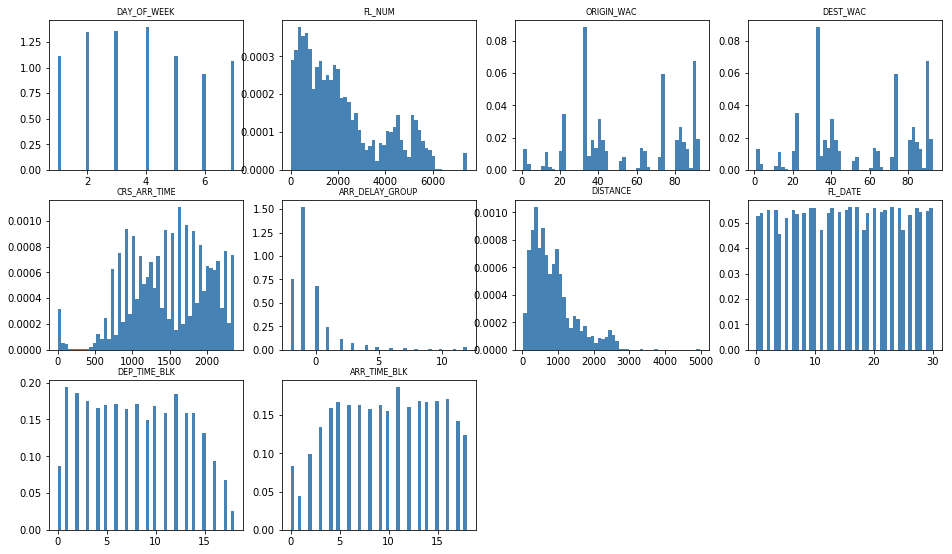

In [36]:
fig = plt.figure(figsize=(16, 16))
list_data_analysis= ['DAY_OF_WEEK', 'FL_NUM', 'ORIGIN_WAC', 'DEST_WAC',
       'CRS_ARR_TIME', 'ARR_DELAY_GROUP',
       'DISTANCE', 'FL_DATE', 'DEP_TIME_BLK','ARR_TIME_BLK']
if True :
    for pos in range(len(list_data_analysis)) :
        item = list_data_analysis[pos]
        X = df_dealays_digit[item]
        ax = fig.add_subplot(5,4, (pos+1))
        h = ax.hist(X, bins=50, color='steelblue', edgecolor='none', normed=True)
        ax.set_title(item, fontsize=8)
    

In [37]:
df_dealays_digit_save = df_dealays_digit.copy()

In [38]:
df_dealays_digit = df_dealays_digit_save.copy()

# <font color='blues'>Création du vecteur étiquettes pour les retards</font>

__Calcul du vecteur retard avec les colonnes CSR_ARR_TIME et ARR_TIME__

In [39]:
arr_delay = np.array(df_dealays_digit['ARR_DELAY_GROUP'])

In [40]:
df_dealays_digit.columns

Index(['DAY_OF_WEEK', 'FL_NUM', 'ORIGIN_WAC', 'DEST_WAC', 'CRS_ARR_TIME',
       'ARR_DELAY_GROUP', 'DISTANCE', 'FL_DATE', 'DEP_TIME_BLK',
       'ARR_TIME_BLK'],
      dtype='object')

__Purge des colonnes utilisées pour le vecteur retard__

In [41]:
print(df_dealays_digit.shape)
df_dealays_digit = df_drop_list_column(df_dealays_digit,['ARR_DELAY_GROUP']) 
print(df_dealays_digit.shape)

(479122, 10)
(479122, 9)


# <font color='blues'>Classification binaire KNN </font>

## <font color='blue'>Creation de la classe binaire : avec retard (-1) ou sans retard (1)</font>

# <font color='blues'>Regression sur les valeurs des retards </font>

## <font color='blue'>Modèle de regression SVR</font>

__Validation des hypothèses: __
* Bruit est normal
* Obervations sont indépendantes et identiquement distribués
* Pb est linéaire : les réalisations (X,y) doivent être rendues indépendantes les unes des autres

### <font color='blue'>Contruction d'un vecteur d'étiquettes</font>

__Regresseur linéaire : SVR__

In [42]:
y_labels = arr_delay

In [43]:
df_dealays_digit.columns

Index(['DAY_OF_WEEK', 'FL_NUM', 'ORIGIN_WAC', 'DEST_WAC', 'CRS_ARR_TIME',
       'DISTANCE', 'FL_DATE', 'DEP_TIME_BLK', 'ARR_TIME_BLK'],
      dtype='object')

In [44]:
# -----------------------------------------------------------------------------
# La colonne separator_column est utilisée pour séparer le jeu de données de test
# du jeu de données d'entraînement.
# Le critere de séparation sont les valeurs de part et d'autre de train_limit
# -----------------------------------------------------------------------------
separator_column = 'FL_DATE'
train_limit = 20

df_dealays_digit, X_train_std, X_test_std, y_train, y_test =  p4_train_test_split_from_column(df_dealays_digit\
                                                                    , separator_column\
                                                                    , train_limit\
                                                                    , y_labels)

In [45]:
df_dealays_digit.columns

Index(['DAY_OF_WEEK', 'FL_NUM', 'ORIGIN_WAC', 'DEST_WAC', 'CRS_ARR_TIME',
       'DISTANCE', 'FL_DATE', 'DEP_TIME_BLK', 'ARR_TIME_BLK'],
      dtype='object')

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR
import time

lsvr_clf = LinearSVR()
param_grid = {'C':[0.5,0.55,0.6,0.65] }
grid_svr = GridSearchCV(lsvr_clf, param_grid, refit=True)
t0 = time.time()
grid_svr.fit(X_train_std, y_train)
print("Recherche des hyper-paramètres en %0.3fs" % (time.time() - t0))
print("Meilleurs hyper-paramètres pour le classifieur LinearSVC: "+str(grid_svr.best_params_))


Recherche des hyper-paramètres en 46.607s
Meilleurs hyper-paramètres pour le classifieur LinearSVC: {'C': 0.55}


In [50]:
lsvr_clf = LinearSVR(C=grid_svr.best_params_['C'])
lsvr_clf.fit(X_train_std, y_train)
y_pred_lsvr = lsvr_clf.predict(X_test_std)

In [51]:
from sklearn.metrics import r2_score
y_pred_lsvr = lsvr_clf.predict(X_test_std)
#score_r2 = lsvr_clf.score(X_test_std,y_pred_lsvr)
score_r2 = r2_score(y_test, y_pred_lsvr)

print("Coefficient de correlation R2 = %0.6f" %score_r2)

Coefficient de correlation R2 = -0.130263


In [52]:
y_test.min(), y_test.max(), y_pred_lsvr.min(), y_pred_lsvr.max()

(-2.0, 12.0, -1.000465598853867, -0.9991408865755091)

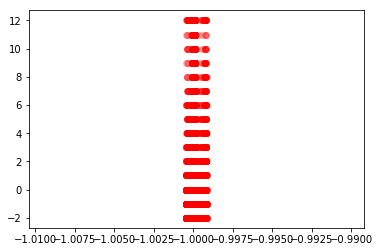

In [53]:
z_ = plt.scatter(y_pred_lsvr, y_test, c='r', alpha=0.2)

__Creation des jeux de données de test et d'entraînement de façon classique__

In [54]:
df_dealays_digit.columns

Index(['DAY_OF_WEEK', 'FL_NUM', 'ORIGIN_WAC', 'DEST_WAC', 'CRS_ARR_TIME',
       'DISTANCE', 'FL_DATE', 'DEP_TIME_BLK', 'ARR_TIME_BLK'],
      dtype='object')

In [55]:
y_labels = arr_delay

In [56]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = \
model_selection.train_test_split(df_dealays_digit, y_labels,test_size=0.3)

In [57]:
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR
import time

lsvr_clf = LinearSVR()
param_grid = {'C':[0.1,1,2,3] }
grid_svr = GridSearchCV(lsvr_clf, param_grid, refit=True)
t0 = time.time()
grid_svr.fit(X_train_std, y_train)
print("Recherche des hyper-paramètres en %0.3fs" % (time.time() - t0))
print("Meilleurs hyper-paramètres pour le classifieur LinearSVC: "+str(grid_svr.best_params_))


Recherche des hyper-paramètres en 82.298s
Meilleurs hyper-paramètres pour le classifieur LinearSVC: {'C': 2}


In [59]:
lsvr_clf = LinearSVR(C=grid_svr.best_params_['C'])
lsvr_clf.fit(X_train_std, y_train)
y_pred_lsvr = lsvr_clf.predict(X_test_std)

In [60]:
y_test.min(), y_test.max(), y_pred_lsvr.min(), y_pred_lsvr.max()

(-2.0, 12.0, -1.0010506291187005, -0.999351947353482)

In [61]:
from sklearn.metrics import r2_score
y_pred_lsvr = lsvr_clf.predict(X_test_std)
#score_r2 = lsvr_clf.score(X_test_std,y_pred_lsvr)
score_r2 = r2_score(y_test, y_pred_lsvr)

print("Coefficient de correlation R2 = %0.6f" %score_r2)

Coefficient de correlation R2 = -0.112366


In [ ]:
plt.scatter(y_test, y_pred_lsvr, color='coral')

In [136]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import r2_score
from sklearn import model_selection

#from sklearn.metrics import Scorer

# <font color='blues'>Validation de l'hypothèse bruit Gaussien</color>

## <font color='blue'>Prédictions de l'estimateur LinearRegression</font>

In [162]:
X_train, X_test, y_train, y_test = \
model_selection.train_test_split(df_dealays_digit.values, y_labels,test_size=0.3)

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [163]:
regr = LinearRegression()
regr.fit(X_train_std, y_train)
y_predict = regr.predict(X_test_std)

score_r2 = r2_score(np.array(y_test), y_predict)
print("Coefficient de correlation R2 = %0.6f" %score_r2)

Coefficient de correlation R2 = 0.020958


In [167]:
arr_y_test = np.array(y_test)

list_error = [ (arr_y_test[j]-y_predict[j])**2  for j in range(0,y_predict.shape[0])]

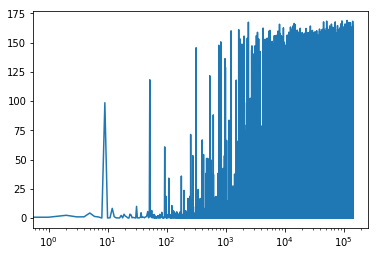

In [168]:
import matplotlib.pyplot as plt
ax = plt.gca()
# Affichage de dexu courbes : 
# --> Courbe 1 : list_alpha,list_error_ridge
# --> Courbe 2 : [10**-5, 10**5],[baseline_error,baseline_error]
z_ = ax.plot(range(0,y_predict.shape[0]),list_error )
ax.set_xscale('log')
#ax.set_yscale('log')
plt.show()

# <font color='blues'>Regressions du package sklearn.linear_model</color>

__Jeu de données de test et d'entraînement__

In [72]:
# -----------------------------------------------------------------------------
# La colonne separator_column est utilisée pour séparer le jeu de données de test
# du jeu de données d'entraînement.
# Le critere de séparation sont les valeurs de part et d'autre de train_limit
# -----------------------------------------------------------------------------
separator_column = 'FL_DATE'
train_limit = 20

df_dealays_digit, X_train_std, X_test_std, y_train, y_test =  p4_train_test_split_from_column(df_dealays_digit\
                                                                    , separator_column\
                                                                    , train_limit\
                                                                    , y_labels)

## <font color='blue'>Prédictions de l'estimateur ElasticNet</font>

__Cas du Lasso__

In [79]:
regr = ElasticNet(l1_ratio = 1)
regr.fit(X_train_std, y_train)
y_predict = regr.predict(X_test_std)

score_r2 = r2_score(y_test, y_predict)
print("Coefficient de correlation R2 = %0.6f" %score_r2)

Coefficient de correlation R2 = -0.002485


__Cas du ridge__

In [80]:
regr = ElasticNet(l1_ratio = 0)
regr.fit(X_train_std, y_train)
y_predict = regr.predict(X_test_std)

score_r2 = r2_score(y_test, y_predict)
print("Coefficient de correlation R2 = %0.6f" %score_r2)

Coefficient de correlation R2 = 0.012573


/home/bangui/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


__Recherche par hyper-paramètres de ElasticNet__

In [106]:
n_alphas = 50
alphas = np.logspace(-1, 0, n_alphas)
param_grid = {'l1_ratio':np.logspace(-4, 0, n_alphas)}

regr = ElasticNet()

grid_regr = GridSearchCV(regr, param_grid, refit=True, scoring='r2', cv=5)
t0 = time.time()
grid_regr.fit(X_train_std, y_train)
print("Recherche des hyper-paramètres en %0.3fs" % (time.time() - t0))
print("Meilleur(s) hyper-paramètre(s) pour le classifieur ElacticNet: "+str(grid_regr.best_params_))


Recherche des hyper-paramètres en 39.001s
Meilleur(s) hyper-paramètre(s) pour le classifieur ElacticNet: {'l1_ratio': 0.0001}


In [105]:
grid_regr.cv_results_['mean_test_score']

array([ 0.00475774,  0.00475402,  0.00474795,  0.00473812,  0.00472208,
        0.00469587,  0.00465291,  0.00458209,  0.00446429,  0.00427181,
        0.00394575,  0.00337018,  0.00239361,  0.00085496, -0.00152408,
       -0.00662909, -0.01266504, -0.01274045, -0.01274045, -0.01274045])

In [108]:
n_alphas = 50
alphas = np.logspace(-1, 0, n_alphas)
param_grid = {'l1_ratio':np.logspace(-4, 0, n_alphas)}

regr = ElasticNetCV(l1_ratio=alphas)

In [109]:
regr.fit(X_train_std, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=array([0.1    , 0.10481, 0.10985, 0.11514, 0.12068, 0.12649, 0.13257,
       0.13895, 0.14563, 0.15264, 0.15999, 0.16768, 0.17575, 0.18421,
       0.19307, 0.20236, 0.2121 , 0.2223 , 0.233  , 0.24421, 0.25595,
       0.26827, 0.28118, 0.29471, 0.30888, 0.32375, 0.33932, 0.35565,
       0.37...513, 0.68665,
       0.71969, 0.75431, 0.7906 , 0.82864, 0.86851, 0.9103 , 0.9541 ,
       1.     ]),
       max_iter=1000, n_alphas=100, n_jobs=1, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0)

In [111]:
regr.score(X_test_std,y_test)

0.011991103186176244

In [114]:
path = regr.path(X_test_std,y_test)

In [123]:
len(path[2])

100

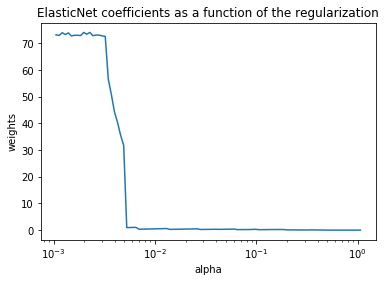

In [124]:
ax = plt.gca()

ax.plot(path[0], path[2])
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('ElasticNet coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [131]:
coefs = []
errors = []
enet = ElasticNet()

for a in alphas:
    enet.set_params(l1_ratio=a)
    enet.fit(X_train_std, y_train)
    coefs.append(enet.coef_)
    #errors.append([ np.mean((enet.predict(X_test_std) - y_test) ** 2)])
    errors.append([ np.mean(r2_score(y_test, enet.predict(X_test_std)))])
    

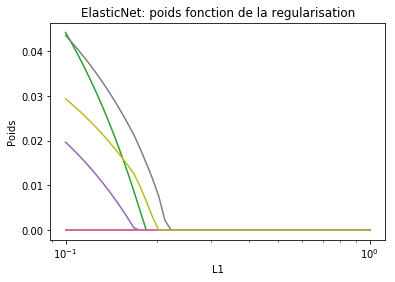

In [132]:
ax = plt.gca()

ax.plot(alphas,coefs)
ax.set_xscale('log')
plt.xlabel('L1')
plt.ylabel('Poids')
plt.title('ElasticNet: poids fonction de la regularisation')
plt.axis('tight')
plt.show()

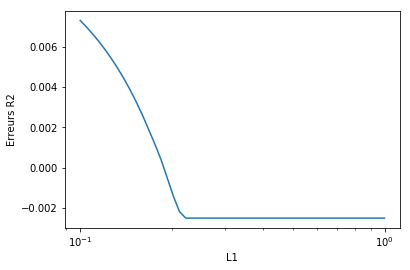

In [134]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('L1')
plt.ylabel('Erreurs R2')
plt.axis('tight')
plt.show()